In [2]:
pip install tensorflow numpy mnist

In [8]:
#pip install tensorflow numpy mnist
import numpy as np
import mnist
from tensorflow import keras

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [9]:
print(train_images.shape)
print(test_images.shape) 
print(train_labels.shape) 
print(test_labels.shape)

print(train_images[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(28, 28)


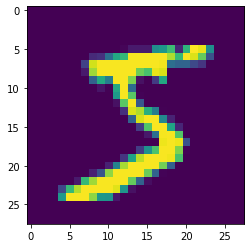

5


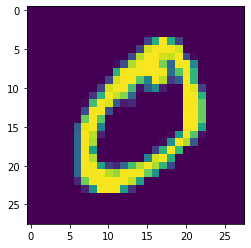

0


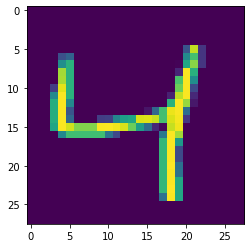

4


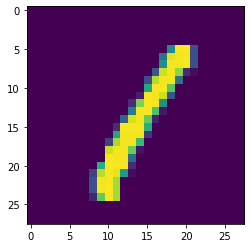

1


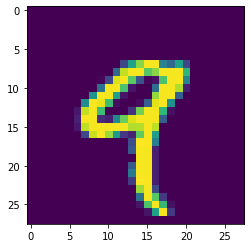

9


In [4]:
import matplotlib.pyplot as plt

for i in range (5):
    plt.imshow(train_images[i])
    plt.show()
    print(train_labels[i])

In [10]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
from tensorflow.keras.utils import to_categorical

print(train_labels[:5])
print(test_labels[:5])

print()
print(to_categorical(train_labels[:5]))

print()
print(to_categorical(test_labels[:5]))

[5 0 4 1 9]
[7 2 1 0 4]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [6]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# hyperparameters for CNN.
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [8]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images,to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3423 - accuracy: 0.9002 - val_loss: 0.1951 - val_accuracy: 0.9455
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1635 - accuracy: 0.9531 - val_loss: 0.1314 - val_accuracy: 0.9594
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.1079 - val_accuracy: 0.9660


So the accuracy is nearly about 96%

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
predictions = model.predict(test_images[:5])

print(np.argmax(predictions, axis=1))

print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]


In [13]:
predict = model.predict(test_images)

In [14]:
predict= np.argmax(predict, axis=1)

In [15]:
print(predict[:5])

[7 2 1 0 4]


In [16]:
print(accuracy_score(predict,test_labels))

0.966
